In [81]:
# import linararies 
from PIL import Image
import numpy as np

# Open an image
image = Image.open('Face.jpg')

# Convert the image to a numpy array
image_array = np.array(image)
# print(image_array)
print(image_array.shape)
print(image_array.ndim)
print(image_array.dtype)

(915, 894, 3)
3
uint8


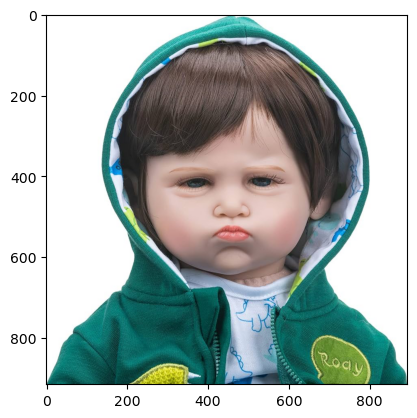

In [82]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.imshow(image)

In [83]:
# convert 3d to 2d image 
image_array_2d = image_array.reshape(-1, 3)
print("Original shape:", image_array.shape)
print("Shape after converting to 2D:", image_array_2d.shape)
print(image_array_2d.ndim)
print(image_array_2d)

Original shape: (915, 894, 3)
Shape after converting to 2D: (818010, 3)
2
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [ 76 127 120]
 [199 231 226]
 [245 255 255]]


In [84]:
rgb_data = image_array_2d
num_centroids = 3  
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)


Randomly selected centroids:
[[182 141 137]
 [ 61  60  58]
 [ 99  74  69]]


distance = abs(x2-x1)+abs(y2-y1)+abs(z2-z1)

In [85]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)


Distances to centroids:
[[305 586 523]
 [305 586 523]
 [305 586 523]
 ...
 [631 144 337]
 [196 477 414]
 [295 576 513]]


In [86]:
# Find the index of the smallest value in each row of the distances array
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[1 1 1 ... 2 1 1]


In [87]:
# to update centroids
for i in range(50):
    updated_centroids = np.zeros_like(centroids)
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_rgb_values = rgb_data[cluster_indices]
        mean_rgb_values = np.mean(cluster_rgb_values, axis=0) 
        updated_centroids[cluster - 1] = mean_rgb_values
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[151 166 163]
 [168 162 154]
 [144 151 139]]


In [88]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)
print(array_d.dtype)

Updated array_3d:
[[168 162 154]
 [168 162 154]
 [168 162 154]
 ...
 [168 162 154]
 [168 162 154]
 [168 162 154]]
uint8


In [89]:
array_3d = array_d.reshape(image_array.shape)
array_3d = np.uint8(array_3d)

uint8


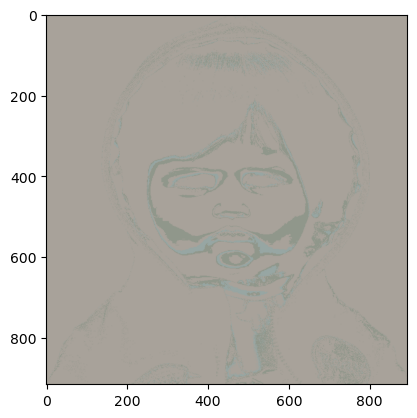

In [90]:
print(array_3d.dtype)
plt.imshow(array_3d)
plt.show()

In [91]:
# initialize centriods
rgb_data = image_array_2d
num_centroids = 10
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)


Randomly selected centroids:
[[255 255 255]
 [ 45  40  44]
 [255 255 255]
 [ 52  44  41]
 [ 67  49  45]
 [  9 140 134]
 [ 18  66  66]
 [173 217 226]
 [ 30 118 104]
 [ 48 130 126]]


In [92]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)


Distances to centroids:
[[  0 636   0 ... 149 513 461]
 [  0 636   0 ... 149 513 461]
 [  0 636   0 ... 149 513 461]
 ...
 [326 194 326 ... 475  71 531]
 [659 527 659 ...  40 404 352]
 [246 626 246 ... 139 503 451]]


In [93]:
# Find the index of the smallest value in each row of the distances array
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[1 1 1 ... 9 8 8]


In [96]:
# to update centroids 
for i in range(50):
    updated_centroids = np.zeros((10, image_array_2d.shape[1])) # Adjusted for 10 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[115.97232926 167.11815706 180.42529232]
 [ 86.72944245  77.33783518  70.95130143]
 [ 44.62029556  45.11164922  43.1777822 ]
 [124.5807725  116.19670042  96.19169086]
 [175.24175716 146.2148075  128.96517769]
 [ 31.55151329 125.02900749 122.12750065]
 [  9.46789074  88.07343454  83.90658389]
 [254.184923   254.60211691 254.76208968]
 [208.91324193 178.94849778 161.44412577]
 [204.91374644 206.77772852 216.74007279]]


In [97]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[254.184923   254.60211691 254.76208968]
 [254.184923   254.60211691 254.76208968]
 [254.184923   254.60211691 254.76208968]
 ...
 [ 31.55151329 125.02900749 122.12750065]
 [204.91374644 206.77772852 216.74007279]
 [254.184923   254.60211691 254.76208968]]


In [98]:
array_3d = array_d.reshape(image_array.shape)
# to ensure data type
array_3d = np.uint8(array_3d)

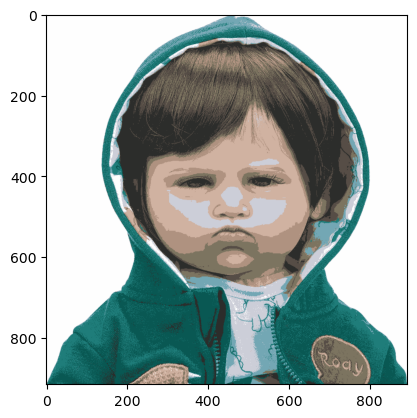

In [99]:
plt.imshow(array_3d)
plt.show()

for k = 20


In [100]:
rgb_data = image_array_2d
num_centroids = 20
num_pixels = rgb_data.shape[0]
centroid_indices = np.random.choice(num_pixels, num_centroids, replace=False)
centroids = rgb_data[centroid_indices]
print("Randomly selected centroids:")
print(centroids)


Randomly selected centroids:
[[ 96  78  74]
 [ 60  73  82]
 [255 255 255]
 [ 22 117 113]
 [255 255 255]
 [ 98 120 133]
 [ 61  55  55]
 [  0  43  41]
 [  0  95  88]
 [ 44 144 142]
 [176 140 126]
 [171 146 141]
 [255 255 255]
 [  4  56  54]
 [255 255 255]
 [255 255 255]
 [ 51 148 139]
 [ 83  83  83]
 [  3  32  38]
 [ 37  33  34]]


In [101]:
# Calculate absolute differences between image_array_2d and centroids
absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - centroids)

# Sum the absolute differences along the RGB axis
distances = np.sum(absolute_diff, axis=2)

# Print the distances
print("Distances to centroids:")
print(distances)


Distances to centroids:
[[517 550   0 ... 516 692 661]
 [517 550   0 ... 516 692 661]
 [517 550   0 ... 516 692 661]
 ...
 [331 108 326 ... 330 250 219]
 [408 441 659 ... 407 583 552]
 [507 540 246 ... 506 682 651]]


In [102]:
closest_centroids_indices = np.argmin(distances, axis=1)

# Map the indices to the rows of the centroids array
clusters = closest_centroids_indices + 1  # Adding 1 to make clusters start from 1

# Print the assigned clusters
print("Assigned clusters:")
print(clusters)
# clusters.shape

Assigned clusters:
[ 3  3  3 ...  4 12  3]


In [103]:
for i in range(50):
    updated_centroids = np.zeros((20, image_array_2d.shape[1])) # Adjusted for 20 centroids
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_data = image_array_2d[cluster_indices]
        mean_data = np.mean(cluster_data, axis=0) 
        updated_centroids[cluster - 1] = mean_data
    
    absolute_diff = np.abs(image_array_2d[:, np.newaxis, :] - updated_centroids)
    distances = np.sum(absolute_diff, axis=2)
    closest_centroids_indices = np.argmin(distances, axis=1)
    clusters = closest_centroids_indices + 1 
    
#     print("Iteration:", i+1)
#     print("Assigned clusters:")
#     print(clusters)
#     print("Distances to centroids:")
#     print(distances)
print("Updated centroids:")
print(updated_centroids)


Updated centroids:
[[127.48144287 156.96747289  51.80942452]
 [122.09839301 146.7633916  164.13455032]
 [254.51528503 254.79779772 254.85774184]
 [159.86879726 181.74745983 202.33654301]
 [  8.11058448  83.02599109  78.96058834]
 [203.83774749 218.39238879 235.28842033]
 [143.94892932 119.57665528 114.25364556]
 [ 13.80210598 100.0796875   95.55355525]
 [ 40.56480058 133.99773899 131.11286968]
 [ 55.6667415  160.33381973 163.35952408]
 [204.67709047 172.22569682 158.80162285]
 [224.19132062 196.79472131 183.62202202]
 [ 60.04602482  53.35812991  50.83746988]
 [ 22.65966588 116.61644571 112.38997089]
 [  4.02735369  62.40053617  59.64731007]
 [ 38.02471442  37.51902957  36.07699904]
 [ 92.61409912 196.70092201 197.38205916]
 [181.09756341 150.33776552 136.30066815]
 [ 85.0590072   74.26849576  69.39995374]
 [110.38135569  95.29519683  92.2108388 ]]


In [104]:
array_d = updated_centroids[clusters - 1]


# Print the updated array_2d
print("Updated array_3d:")
print(array_d)

Updated array_3d:
[[254.51528503 254.79779772 254.85774184]
 [254.51528503 254.79779772 254.85774184]
 [254.51528503 254.79779772 254.85774184]
 ...
 [ 40.56480058 133.99773899 131.11286968]
 [203.83774749 218.39238879 235.28842033]
 [254.51528503 254.79779772 254.85774184]]


In [105]:
array_3d = array_d.reshape(image_array.shape)
# to ensure datatype
array_3d = np.uint8(array_3d)

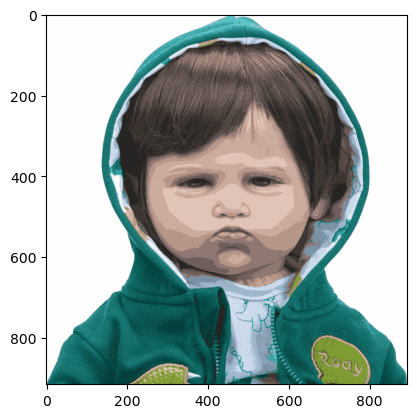

In [106]:
plt.imshow(array_3d)
plt.show()
#  to show image